In [1]:
import pandas as pd

df = pd.read_csv('financial_data.csv')
df.head()


,Company,Year,Revenue,Net Income,Assets,Liabilities,Cash Flow
0,Microsoft,2025,"263,400,000,000","89,500,000,000","490,600,000,000","198,300,000,000","101,200,000,000"
1,Microsoft,2024,"232,200,000,000","78,900,000,000","450,200,000,000","195,000,000,000","95,600,000,000"
2,Microsoft,2023,"211,900,000,000","72,400,000,000","411,600,000,000","191,800,000,000","89,000,000,000"
3,Tesla,2024,"96,800,000,000","14,900,000,000","110,300,000,000","41,200,000,000","16,000,000,000"
4,Tesla,2025,"99,660,000,000","15,700,000,000","115,700,000,000","43,100,000,000","17,200,000,000"


In [3]:
# Convert financial columns to numeric values
cols_to_convert = ['Revenue', 'Net Income', 'Assets', 'Liabilities', 'Cash Flow']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col].str.replace('[\$,B]', '', regex=True), errors='coerce')


In [4]:
df['Revenue Growth (%)'] = df.groupby('Company')['Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income'].pct_change() * 100
df['Assets Growth (%)'] = df.groupby('Company')['Assets'].pct_change() * 100
df['Liabilities Growth (%)'] = df.groupby('Company')['Liabilities'].pct_change() * 100
df['Cash Flow Growth (%)'] = df.groupby('Company')['Cash Flow'].pct_change() * 100

In [5]:
df.describe()

,Year,Revenue,Net Income,Assets,Liabilities,Cash Flow,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow Growth (%)
count,9.000000,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,6.000000,6.000000,6.000000,6.000000,6.000000
mean,2024.000000,2.435622e+11,6.532222e+10,3.074222e+11,1.741333e+11,7.514444e+10,-5.094611,-5.962108,-4.444102,-1.434782,-4.026490
std,0.866025,1.314140e+11,3.927759e+10,1.543544e+11,1.071108e+11,4.513979e+10,5.066099,6.818397,5.606539,3.888364,6.214900
min,2023.000000,9.400000e+10,1.360000e+10,1.042000e+11,3.980000e+10,1.530000e+10,-11.845103,-13.375796,-9.939499,-7.656613,-11.046512
25%,2023.000000,9.966000e+10,1.570000e+10,1.157000e+11,4.310000e+10,1.720000e+10,-7.976675,-10.942251,-8.489179,-1.658365,-6.561223
50%,2024.000000,2.322000e+11,7.890000e+10,3.614000e+11,1.950000e+11,9.560000e+10,-4.698484,-6.243644,-5.334895,-1.459766,-5.041514
75%,2025.000000,3.833000e+11,9.690000e+10,4.116000e+11,2.829000e+11,1.091000e+11,-3.582674,-3.638589,-2.391564,-1.054664,-3.856582
max,2025.000000,4.127000e+11,1.048000e+11,4.906000e+11,2.894000e+11,1.186000e+11,2.954545,5.369128,4.895739,4.611650,7.500000


## Compare Companies Side-by-Side

#### Average performance of each company over the three years.


In [6]:
df.groupby('Company')[['Revenue', 'Net Income', 'Assets', 'Liabilities', 'Cash Flow']].mean()


,Revenue,Net Income,Assets,Liabilities,Cash Flow
Company,,,,,
Apple,3.980333e+11,1.009667e+11,3.614000e+11,2.860000e+11,1.140000e+11
Microsoft,2.358333e+11,8.026667e+10,4.508000e+11,1.950333e+11,9.526667e+10
Tesla,9.682000e+10,1.473333e+10,1.100667e+11,4.136667e+10,1.616667e+10


#### Fastest Growing Company

In [7]:
df.groupby('Company')[['Revenue Growth (%)', 'Net Income Growth (%)']].mean()

,Revenue Growth (%),Net Income Growth (%)
Company,,
Apple,-3.627669,-3.842063
Microsoft,-10.293783,-10.040926
Tesla,-1.362382,-4.003334


## Visualizing the Trends

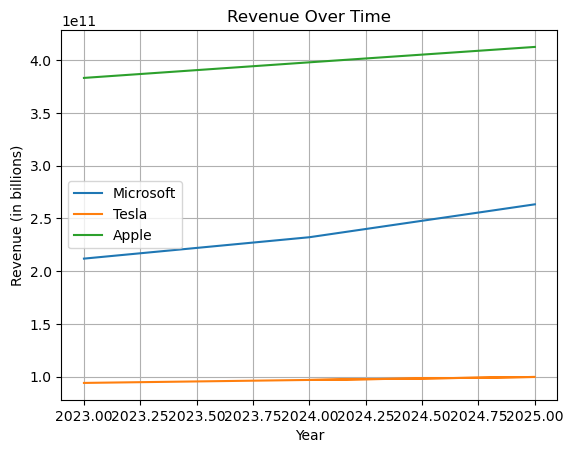

In [9]:
import matplotlib.pyplot as plt

for company in df['Company'].unique():
    subset = df[df['Company'] == company]
    plt.plot(subset['Year'], subset['Revenue'], label=company)

plt.title('Revenue Over Time')
plt.xlabel('Year')
plt.ylabel('Revenue (in billions)')
plt.legend()
plt.grid(True)
plt.show()


## Spot Strategic Signals

In [11]:
df['Debt Ratio'] = df['Liabilities'] / df['Assets']
df['Profit Margin (%)'] = (df['Net Income'] / df['Revenue']) * 100

In [12]:
df.groupby('Company')[['Debt Ratio', 'Profit Margin (%)']].mean()

,Debt Ratio,Profit Margin (%)
Company,,
Apple,0.791534,25.364985
Microsoft,0.434442,34.041709
Tesla,0.376000,15.204736
